# Data Overview from opendata.dk

The available parking spaces and their occupancy are counted in Copenhagen and the data sets are available on [Opendata](opendata.dk). There are two datasets available: 
- **Parking spaces**: The data set shows legal parking spaces during the day (7am-6pm) at street level (on public and private shared roads), parking spaces in publicly owned parking facilities as well as parking spaces without a parking system. Parking options for electric cars, shared cars, taxis and disabled drivers appear. Also includes parking spaces reserved for embassies and consulates.
- **Parking counts**: Parking counts on roads/road sections are conducted twice in March and October at 12:00, 17:00 and 22:00 in selected areas. Parking occupancy rates are calculated based on the parking counts.

The data sets will be analyzed and preprocessed in the following cells.

## Preamble

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re


In [159]:
# Set pandas display options to show all columns for .head command
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", None)        # Auto-detect the display width
pd.set_option("display.max_colwidth", None) # Show full content of each column

In [160]:
# Loading the data and files
data_path = os.path.abspath(os.path.join(os.pardir, "projectData"))

# Load csv data into pandas dataframe
parking_spaces_name = "parking_spaces.csv"
parking_spaces_path = os.path.join(data_path, parking_spaces_name)
df = pd.read_csv(parking_spaces_path)

## Cleaning the data

### Data overview

The dataset contains 26 columns and 28762 rows.

| Original Column name              | Renamed Column name   | Description   |
| ------                            | ------                | ------        |
|**FID**                            | NaN                   | Identifier for Parking Space Object strictly used for this dataset|
|**vejkode**                        | NaN                   | Numeric Identifier for a given street |
|**vejnavn**                        | NaN                   | Street name|
|**antal_pladser**                  | NaN                   | Number of parking spaces registered under Parking Space Object |
|**restriktion**                    | NaN                   | Restriction boolean indicator |
|**vejstatus**                      | NaN                   | Street type, e.g. public road or private area |
|**vejside**                        | NaN                   | Side of the road, i.e. even or odd numbered house numbers |
|**bydel**                          | NaN                   | District, e.g. Nørrebro, Valby, etc. |
|**p_ordning**                      | NaN                   | Parking Space Object type, e.g. Electric car parking w. charger, Handicap, Blue zone, etc. |
|**p_type**                         | NaN                   | Parking Space Object physical type, e.g. Marked parking, 45deg marked parking, |
|**p_status**                        | NaN                   | Status of whether the parking spot is "created" or "temporarily out of service" |
|**rettelsedato**                   | NaN                   | Date of correction |
|**oprettelsesdato**                | NaN                   | Date of creation |
|**x**                              | NaN                   | Individual Text description for Parking Space Object type, e.g. license plate for private handicap parking spot |
|**id**                             | NaN                   | Unique Identifer for each Parking Space Object |
|**taelle_id**                      | NaN                   | Identifier for internal counting/tally procedures
|**startdato_midlertidigt_nedlagt** | NaN                   | Start date for registered Out of Service (only NaN in dataset) |
|**slutdato_midlertidigt_nedlagt**  | NaN                   | End date for registered Out of Service (only NaN and a single entry in dataset) |
|**restriktionstype**               | NaN                   | Restriction type name |
|**restriktionstekst**              | NaN                   | Restriction description, e.g. "8-18" if parking not allowed in given hours |
|**taelle_note**                    | NaN                   | Text notes for internal counting/tally procedures |
|**delebilsklub**                   | NaN                   | Car sharing company |
|**aendring_p_ordning**             | NaN                   | Indicator if parking space has been converted to Electric parking w.o. charger |
|**uuid**                           | NaN                   | Unique Identifer for each Parking Space Object |
|**ogc_fid**                        | NaN                   | Numeric Identifier for Parking Space Object strictly used for this dataset|
|**wkb_geometry**                   | NaN                   | Location of Parking Space Object, in the form of a MultiLineString with altitude/longitude coordinates |

In [161]:
# Quick overview of some value examples
for col in df.columns:
    l = list(df[col].unique())
    l_len = len(l)
    if l_len > 10:
        l = l[:10]
    print(col, "\n", l, "\nLen:\n", l_len, "\n")

FID 
 ['p_pladser.1', 'p_pladser.2', 'p_pladser.3', 'p_pladser.4', 'p_pladser.5', 'p_pladser.6', 'p_pladser.7', 'p_pladser.8', 'p_pladser.9', 'p_pladser.10'] 
Len:
 28762 

vejkode 
 [np.int64(4), np.int64(8), np.int64(72), np.int64(12), np.int64(16), np.int64(20), np.int64(24), np.int64(28), np.int64(32), np.int64(36)] 
Len:
 2008 

vejnavn 
 ['Abel Cathrines Gade', 'Abildgaardsgade', 'Ahrenkildes Allé', 'Abildhøj', 'Abrikosvej', 'Absalonsgade', 'Adelgade', 'Admiralgade', 'Adriansvej', 'Agerbo'] 
Len:
 2008 

antal_pladser 
 [np.float64(10.0), np.float64(4.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(11.0), np.float64(13.0), np.float64(8.0), np.float64(5.0), np.float64(7.0)] 
Len:
 71 

restriktion 
 ['nej', 'ja', nan] 
Len:
 3 

vejstatus 
 ['Offentlig vej', 'Privat fællesvej', 'Privat vej', nan, 'Privat fællesvej §10 stk3', 'Privat fællessti'] 
Len:
 6 

vejside 
 ['Lige husnr.', 'Ulige husnr.', nan, 'Midt i gaden', 'P-område/areal'] 
Len:
 5 

bydel 
 ['Vesterb

In [162]:
# Drop redundant columns
df_dropped = df.drop(
    columns=[
        "FID",
        #"vejkode",
        #"vejnavn",
        #"antal_pladser",
        #"restriktion",
        "vejstatus",
        "vejside",
        #"bydel",
        #"p_ordning",
        "p_type",
        "p_status",
        #"rettelsedato",
        #"oprettelsesdato",
        "x",
        "id",
        "taelle_id",
        "startdato_midlertidigt_nedlagt",
        "slutdato_midlertidigt_nedlagt",
        #"restriktionstype",
        #"restriktionstekst",
        "taelle_note",
        "delebilsklub",
        #"aendring_p_ordning",
        "uuid",
        "ogc_fid",
        #"wkb_geometry",
    ], errors='ignore')

In [163]:
# Drop any rows which do not contain quantifiable informations
df_dropped = df_dropped.dropna(subset=[
    "antal_pladser",
    "bydel",
    "wkb_geometry"
])

### Renaming columns and changing the types

In [ ]:
# Rename columns to English and more specific naming
cols_rename = {
    "vejkode": "street_code",
    "vejnavn": "street_name", 
    "antal_pladser": "no_of_spaces",
    "restriktion": "restriction",
    "bydel": "district",
    "p_ordning": "parking_type",
    "rettelsedato": "correction_date", 
    "oprettelsesdato": "creation_date",
    "restriktionstype": "restriction_type",
    "restriktionstekst": "restriction_text",
    "aendring_p_ordning": "changed_parking_type",
}

df_renamed = df_dropped.copy()
df_renamed.rename(columns=cols_rename, inplace=True)

#--------------------------------------------------------------------------
# Convert to bool values and fill NaN with False
df_renamed["restriction"] = df_renamed["restriction"].fillna(False)
df_renamed["restriction"] = df_renamed["restriction"].map({"ja": True, "nej": False})

#--------------------------------------------------------------------------
# Define the conversion dictionary
convert_dict = {
    "no_of_spaces": int,
    "restriction": bool
}

# Convert columns using the dictionary
df_renamed = df_renamed.astype(convert_dict)

### Convert geometry data for easier manipulation

In [164]:
# Drop duplicates based on location coordinates
subset = df_dropped[
    df_dropped.duplicated(subset=['wkb_geometry'])
]

df_dropped = pd.concat([df_dropped, subset, subset]).drop_duplicates(keep=False)

In [165]:
# Helper function to convert the Multilinestring format to a list of tuples
def multilinestring_to_tuplelist(s):
    matches = re.findall(r'[-\d\.]+ [-\d\.]+', s)
    coord_list = []
    for match in matches:
        lon, lat = map(float, match.split())
        coord_list.append((lat, lon))
    return coord_list

In [166]:
# Create new columns with parking space coordinates as list of tuples
df_dropped["coordinates"] = df_dropped["wkb_geometry"].apply(multilinestring_to_tuplelist)

# Drop the original geometry column
df_dropped = df_dropped.drop(columns=["wkb_geometry"], errors='ignore')

In [186]:
df_renamed["creation_date"]

0            2003-05-28T00:00:00
1            2003-05-28T00:00:00
2            2003-05-28T00:00:00
3            2003-05-28T00:00:00
4            2003-05-28T00:00:00
                  ...           
28757    2024-07-22T11:46:35.255
28758    2021-05-21T10:46:56.627
28759    2021-05-21T10:46:56.626
28760    2021-05-21T10:41:59.307
28761    2021-05-21T10:44:18.632
Name: creation_date, Length: 28716, dtype: object

In [ ]:
# Manual extraction of years from creation and correction date columns
df_renamed["creation_year"] = df_renamed["creation_date"].str.slice(0, 4).astype(int)
df_renamed["correction_year"] = df_renamed["correction_date"].str.slice(0, 4).astype(int)

,street_code,street_name,no_of_spaces,restriction,district,parking_type,correction_date,creation_date,restriction_type,restriction_text,changed_parking_type,coordinates,creation_year,correction_year
0,4,Abel Cathrines Gade,10,NaN,Vesterbro-Kongens Enghave,Grøn betalingszone,2021-01-15T20:16:10.536,2003-05-28T00:00:00,NaN,NaN,NaN,"[(55.67151987967718, 12.558951218164538), (55.67130454392531, 12.559712354787063)]",2003,2021
1,4,Abel Cathrines Gade,4,NaN,Vesterbro-Kongens Enghave,Grøn betalingszone,2021-01-15T20:16:13.164,2003-05-28T00:00:00,NaN,NaN,NaN,"[(55.671430595065814, 12.559540823191533), (55.67134719577676, 12.559837257903178)]",2003,2021
2,4,Abel Cathrines Gade,4,NaN,Vesterbro-Kongens Enghave,Grøn betalingszone,2025-01-30T09:03:14.719,2003-05-28T00:00:00,NaN,NaN,NaN,"[(55.6717938811232, 12.558251725661727), (55.671709896567116, 12.55855041814385)]",2003,2025
3,4,Abel Cathrines Gade,1,NaN,Vesterbro-Kongens Enghave,Grøn betalingszone,2021-01-15T20:16:10.193,2003-05-28T00:00:00,NaN,NaN,NaN,"[(55.67189963770022, 12.55787572262436), (55.67186525478351, 12.557997967050476)]",2003,2021
4,4,Abel Cathrines Gade,2,NaN,Vesterbro-Kongens Enghave,Grøn betalingszone,2021-01-15T20:16:17.972,2003-05-28T00:00:00,NaN,NaN,NaN,"[(55.671685523568456, 12.55863434613667), (55.67164406376279, 12.558780742845714)]",2003,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28757,8848,Paradisæblevej,2,NaN,Valby,NaN,2024-07-22T11:47:57.372,2024-07-22T11:46:35.255,NaN,NaN,NaN,"[(55.65539130387545, 12.505385829878438), (55.65543671286934, 12.505210201007097)]",2024,2024
28758,9802,Frederikssundsvejtunnelen,8,NaN,Bispebjerg,NaN,2021-09-24T12:58:28.303,2021-05-21T10:46:56.627,NaN,NaN,NaN,"[(55.7057416530243, 12.516604949732713), (55.70580547583819, 12.516887733889895)]",2021,2021
28759,9802,Frederikssundsvejtunnelen,5,NaN,Vanløse,NaN,2021-09-24T13:01:43.096,2021-05-21T10:46:56.626,NaN,NaN,NaN,"[(55.70570541959525, 12.516441025555869), (55.7057392257745, 12.516591954611087)]",2021,2021
28760,9802,Frederikssundsvejtunnelen,12,NaN,Bispebjerg,NaN,2022-11-04T10:43:46.618,2021-05-21T10:41:59.307,NaN,NaN,NaN,"[(55.706001487888024, 12.51673459809939), (55.70607146093328, 12.516649309094197), (55.706167852901665, 12.516512523992397), (55.706286938581655, 12.516339510028077), (55.70632599962839, 12.516280012282982), (55.70636578539876, 12.516213535568658)]",2021,2022


In [ ]:
df_renamed["creation_date"][:4]
# df_renamed["creation_year"] = df_renamed["creation_date"].dt.year

0    2003-05-28T00:00:00
1    2003-05-28T00:00:00
2    2003-05-28T00:00:00
3    2003-05-28T00:00:00
Name: creation_date, dtype: object

In [170]:
# Loading the data set
cleaned_data_path = os.path.join(data_path, "parking_spaces.csv")
df_spaces = pd.read_csv(cleaned_data_path)
df_spaces.columns = df_spaces.columns.str.strip()

# Drop redundant columns and assign the result back to df
df = df_spaces.drop(columns=["FID", "vejside", "bemaerkning", "taelle_id", "startdato_midlertidigt_nedlagt",
                      "slutdato_midlertidigt_nedlagt", "restriktionstype", "restriktionstekst", "taelle_note",
                      "delebilsklub", "aendring_p_ordning", "x", "uuid", "ogc_fid"],  errors='ignore')

# Replace NaN with empty string and -1

# Rename/translate the columns to English to be more readable
df_spaces.rename(columns={
    "vejkode": "street_code", 
    "vejnavn": "street_name", 
    "antal_pladser": "num_spaces", 
    "restriktion": "restriction", 
    "vejstatus": "street_status", 
    "bydel": "district", 
    "p_ordning": "parking_order", 
    "p_type": "parking_type", 
    "p_status": "parking_status", 
    "rettelsedato": "correction_date", 
    "oprettelsesdato": "creation_date", 
    "id": "id", 
    "wkb_geometry": "wkb_geometry"
}, inplace=True)

for col in df_spaces.columns:
    unique_vals = df_spaces[col].unique()
    print(f"Column '{col}' has {len(unique_vals)} unique entries:")
    print(unique_vals)
    print("-" * 40)

Column 'FID' has 28762 unique entries:
['p_pladser.1' 'p_pladser.2' 'p_pladser.3' ... 'p_pladser.28760'
 'p_pladser.28761' 'p_pladser.28762']
----------------------------------------
Column 'street_code' has 2008 unique entries:
[   4    8   72 ... 8847 8848 9802]
----------------------------------------
Column 'street_name' has 2008 unique entries:
['Abel Cathrines Gade' 'Abildgaardsgade' 'Ahrenkildes Allé' ...
 'Burgundyvej' 'Paradisæblevej' 'Frederikssundsvejtunnelen']
----------------------------------------
Column 'num_spaces' has 71 unique entries:
[ 10.   4.   1.   2.   3.  11.  13.   8.   5.   7.   6.  29.  20.  16.
   9.  12.  14.  31.  26.  51.  30.  15.  32.  33.  nan  18.  17.  23.
  24.  35.  47.  19.  28.  25. 191.  21.  38.   0.  22.  27.  37.  36.
  54.  49.  52.  34.  82.  83.  46.  44.  40.  61.  41.  66.  39. 407.
  42.  69. 164.  62.  45.  73.  56.  58.  57.  55.  67. 266.  50. 155.
  53.]
----------------------------------------
Column 'restriction' has 3 unique en

In [171]:
# Save the cleaned data to a new CSV file
df_spaces.to_csv(os.path.join(data_path, "cleaned_parking_spaces.csv"), index=False)

df_spaces.head()

,FID,street_code,street_name,num_spaces,restriction,street_status,vejside,district,parking_order,parking_type,parking_status,correction_date,creation_date,x,id,taelle_id,startdato_midlertidigt_nedlagt,slutdato_midlertidigt_nedlagt,restriktionstype,restriktionstekst,taelle_note,delebilsklub,aendring_p_ordning,uuid,ogc_fid,wkb_geometry
0,p_pladser.1,4,Abel Cathrines Gade,10.0,nej,Offentlig vej,Lige husnr.,Vesterbro-Kongens Enghave,Grøn betalingszone,Uafmærket parkering,NaN,2021-01-15T20:16:10.536,2003-05-28T00:00:00,NaN,15287,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f091dc0c-e4c1-49d1-8c0e-f2abe9cf3274,1,"MULTILINESTRING ((12.558951218164538 55.67151987967718, 12.559712354787063 55.67130454392531))"
1,p_pladser.2,4,Abel Cathrines Gade,4.0,nej,Offentlig vej,Ulige husnr.,Vesterbro-Kongens Enghave,Grøn betalingszone,Uafmærket parkering,NaN,2021-01-15T20:16:13.164,2003-05-28T00:00:00,NaN,15282,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f78e2d50-6d05-4efe-82da-ac3306e91544,2,"MULTILINESTRING ((12.559540823191533 55.671430595065814, 12.559837257903178 55.67134719577676))"
2,p_pladser.3,4,Abel Cathrines Gade,4.0,nej,Offentlig vej,Ulige husnr.,Vesterbro-Kongens Enghave,Grøn betalingszone,Uafmærket parkering,NaN,2025-01-30T09:03:14.719,2003-05-28T00:00:00,NaN,15284,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6f1dcd37-a01d-4c43-af33-1ca17476e116,3,"MULTILINESTRING ((12.558251725661727 55.6717938811232, 12.55855041814385 55.671709896567116))"
3,p_pladser.4,4,Abel Cathrines Gade,1.0,nej,Offentlig vej,Ulige husnr.,Vesterbro-Kongens Enghave,Grøn betalingszone,Uafmærket parkering,NaN,2021-01-15T20:16:10.193,2003-05-28T00:00:00,NaN,15285,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9a26e4f5-758f-48ab-ad0d-e0549ecad115,4,"MULTILINESTRING ((12.55787572262436 55.67189963770022, 12.557997967050476 55.67186525478351))"
4,p_pladser.5,4,Abel Cathrines Gade,2.0,nej,Offentlig vej,Ulige husnr.,Vesterbro-Kongens Enghave,Grøn betalingszone,Uafmærket parkering,oprettet,2021-01-15T20:16:17.972,2003-05-28T00:00:00,NaN,44281,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aa712abe-4293-4c75-b991-af4f3f5c74c6,5,"MULTILINESTRING ((12.55863434613667 55.671685523568456, 12.558780742845714 55.67164406376279))"


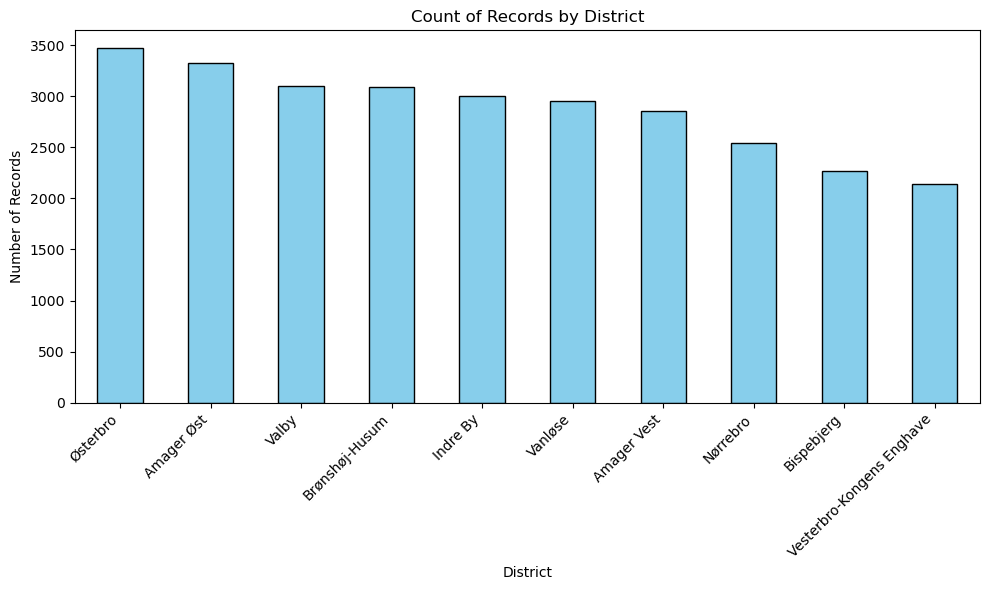

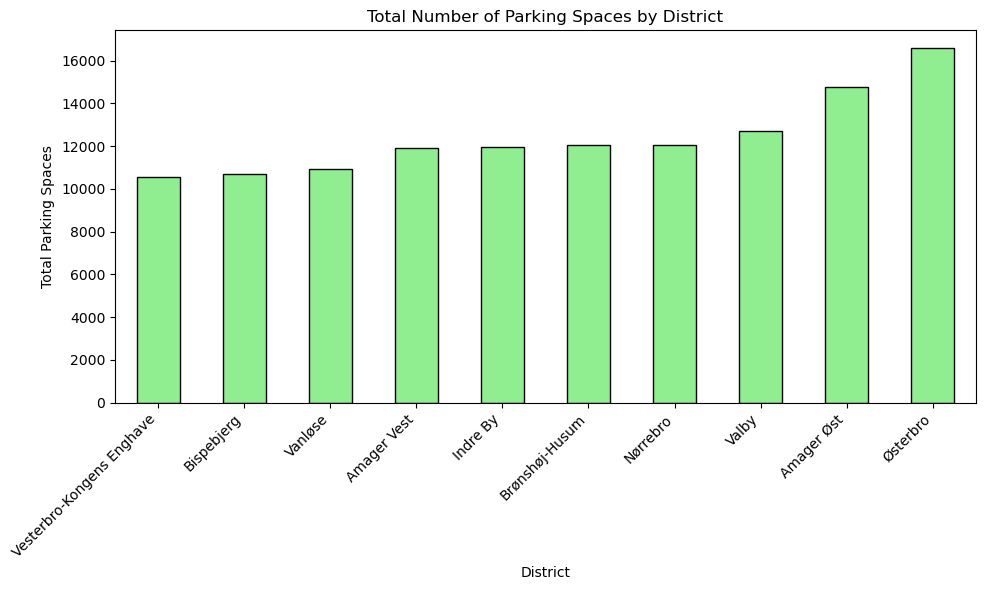

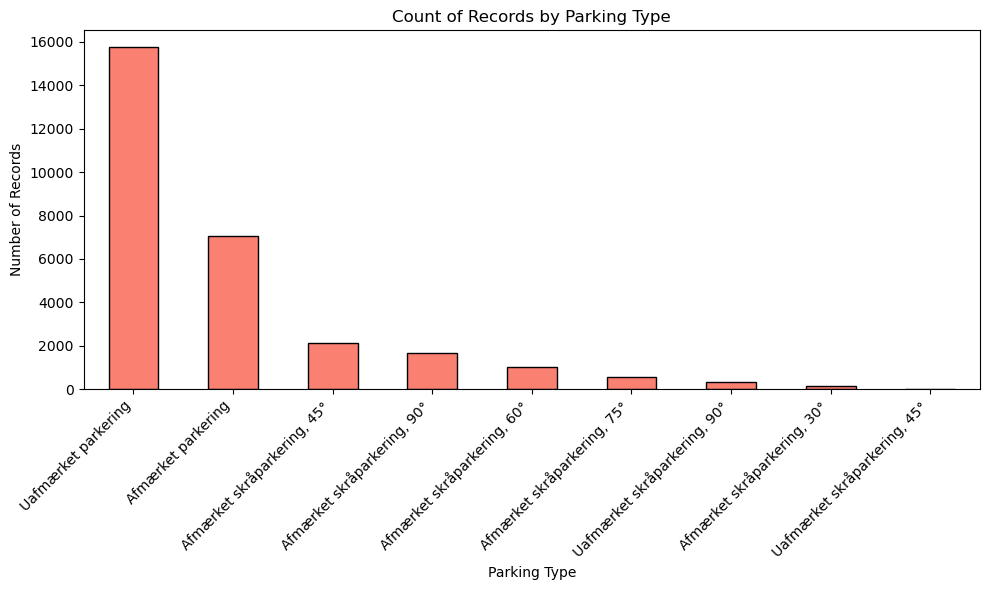

In [172]:
# Ensure the 'num_spaces' column is numeric; convert if needed:
df_spaces['num_spaces'] = pd.to_numeric(df_spaces['num_spaces'], errors='coerce')

# ---------------------------
# Graph 1: Count of Records by District
# ---------------------------
district_counts = df_spaces['district'].value_counts()

plt.figure(figsize=(10, 6))
district_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Count of Records by District")
plt.xlabel("District")
plt.ylabel("Number of Records")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ---------------------------
# Graph 2: Total Number of Parking Spaces by District
# ---------------------------
spaces_by_district = df_spaces.groupby('district')['num_spaces'].sum()
# Sorting the values (optional) to see the lower-to-higher sum distribution.
spaces_by_district = spaces_by_district.sort_values()

plt.figure(figsize=(10, 6))
spaces_by_district.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Total Number of Parking Spaces by District")
plt.xlabel("District")
plt.ylabel("Total Parking Spaces")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ---------------------------
# Graph 3: Count of Records by Parking Type
# ---------------------------
# (Assuming the column is named 'parking_type'; adjust if it is different.)
parking_type_counts = df_spaces['parking_type'].value_counts()

plt.figure(figsize=(10, 6))
parking_type_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Count of Records by Parking Type")
plt.xlabel("Parking Type")
plt.ylabel("Number of Records")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


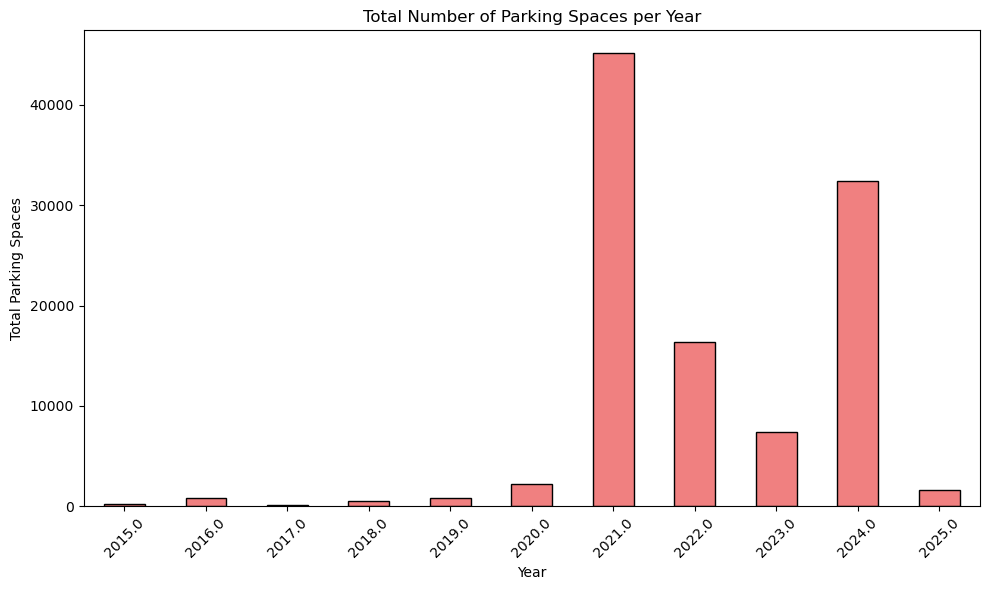

In [173]:
# Convert 'creation_date' to datetime and extract the year.
df_spaces['correction_date'] = pd.to_datetime(df_spaces['correction_date'], errors='coerce')
df_spaces['correction_year'] = df_spaces['correction_date'].dt.year

# Group by the creation year and sum the total number of parking spaces.
spaces_by_year = df_spaces.groupby('correction_year')['num_spaces'].sum().sort_index()

# Plot a bar chart to visualize the total parking spaces per year.
plt.figure(figsize=(10, 6))
spaces_by_year.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Total Number of Parking Spaces per Year")
plt.xlabel("Year")
plt.ylabel("Total Parking Spaces")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()